<a href="https://colab.research.google.com/github/dmburns1729/Class-Files/blob/main/Copy_of_09_12_Multivariate_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multivariate Analysis & Visualizations

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Load the [cleaned medical data](https://drive.google.com/file/d/15QvGnjlYvVd8bxl-Fl_EPVgmfvgATGZB/view?usp=sharing) using the url in the cell below:

In [ ]:
## excel file url
url ="https://docs.google.com/spreadsheets/d/e/2PACX-1vRUYiMWJ3WI6lrrG8rdRFy49aaKSqtlZhbqHodoJfQeDnWj1bgvdSCVM0tnlTkExjhSv7f0LSfIiTVU/pub?output=xlsx"

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_excel(url)
df.head()

,State,Lat,Lng,Area,Children,Age,Income,Marital,Gender,ReAdmis,...,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services,Initial_days,Base_charge,Additional_charges
0,AL,34.34960,-86.72508,Suburban,1.0,53.0,86575.93,Divorced,Male,0.0,...,0.0,1.0,1.0,1.0,0.0,1.0,Blood Work,10.585770,3726.702860,17939.40342
1,FL,30.84513,-85.22907,Urban,3.0,51.0,46805.99,Married,Female,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,Intravenous,15.129562,4193.190458,17612.99812
2,SD,43.54321,-96.63772,Suburban,3.0,53.0,14370.14,Widowed,Female,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,Blood Work,4.772177,2434.234222,17505.19246
3,MN,43.89744,-93.51479,Suburban,0.0,78.0,39741.49,Married,Male,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,Blood Work,1.714879,2127.830423,12993.43735
4,OK,35.67302,-95.19180,Urban,3.0,76.0,81999.88,Never Married,Male,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,Blood Work,5.957250,2636.691180,12742.58991


1) This is a fun place to start!  Make a scatterplot with Lng on the x axis and Lat on the y axis.
- You can use plt.scatter() or sns.scatterplot().
- I recommend looking up the documentation to see how to use these functions.

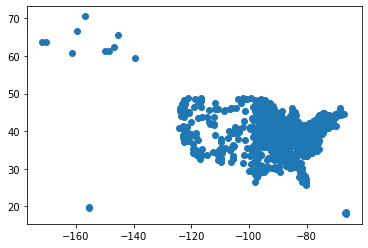

In [ ]:
# matplotlib
plt.scatter(data = df, x = 'Lng',y = 'Lat')

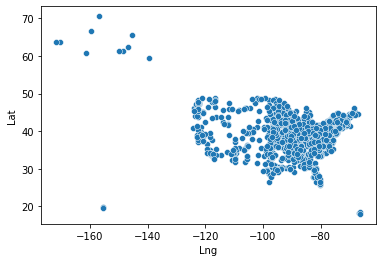

In [ ]:
# seaborn
sns.scatterplot(data = df, x = 'Lng',y = 'Lat')

2a) Make a scatterplot that shows the Base_charge vs. Initial_days
- Use plt.scatter() or sns.scatterplot()

- Is there a relationship between Base_charge and Initial_days?

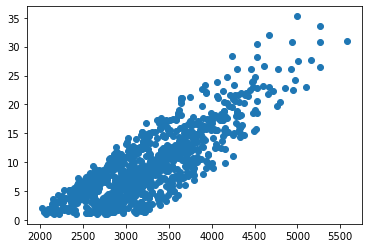

In [ ]:
# There is a positive correlation between initial days and base charge
# matplotlib
plt.scatter(data = df, x = 'Base_charge',y = 'Initial_days')

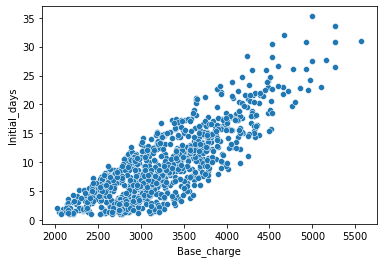

In [ ]:
# seaborn
sns.scatterplot(data = df, x = 'Base_charge',y = 'Initial_days')

2a-Alternative) Make a [seaborn regplot](https://seaborn.pydata.org/generated/seaborn.regplot.html) that shows the Base_charge vs. Initial_days.
What advantage does the regplot have over the scatterplot, in terms of identifying relationships?
- Use sns.regplot(data=df, x=column name, y=column name, line_kws={'color':'black', 'ls': '--'})

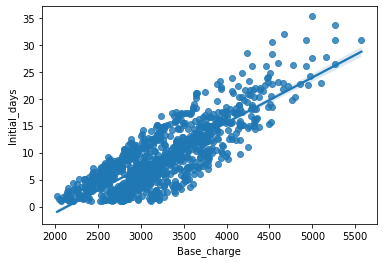

In [ ]:
sns.regplot(data = df, x = 'Base_charge',y = 'Initial_days')

In [ ]:
df.dtypes

State                  object
Lat                   float64
Lng                   float64
Area                   object
Children              float64
Age                   float64
Income                float64
Marital                object
Gender                 object
ReAdmis               float64
VitD_levels           float64
Doc_visits            float64
Full_meals_eaten      float64
vitD_supp             float64
Soft_drink            float64
Initial_admin          object
HighBlood             float64
Stroke                float64
Complication_risk      object
Overweight            float64
Arthritis             float64
Diabetes              float64
Hyperlipidemia        float64
BackPain              float64
Anxiety               float64
Allergic_rhinitis     float64
Reflux_esophagitis    float64
Asthma                float64
Services               object
Initial_days          float64
Base_charge           float64
Additional_charges    float64
dtype: object

2b) Make a scatterplot that shows the Base_charge vs. Initial days that is color-coded based on the complication risk.
What have you learned about complication risk, days and charge?
- Use sns.scatterplot() using the hue argument for the third variable.

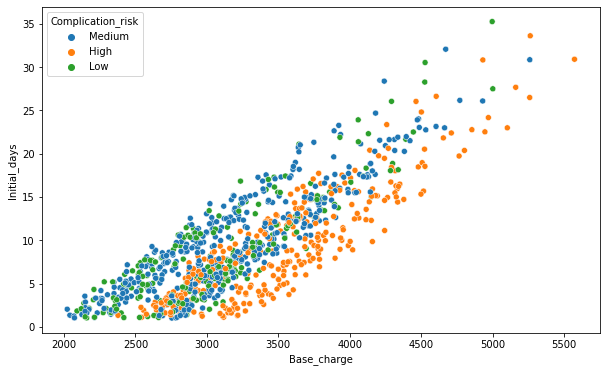

In [ ]:
plt.figure(figsize = (10,6));
sns.scatterplot(data = df, x = 'Base_charge',y = 'Initial_days', hue = 'Complication_risk')

2c) Make an lmplot that shows the Base_charge vs. Initial days that is color-coded based on the complication risk.
- Use sns.lmplot() using the hue argument for the third variable.
- Does this graph have any advantage over the previous scatterplot graph?


<Figure size 720x432 with 0 Axes>

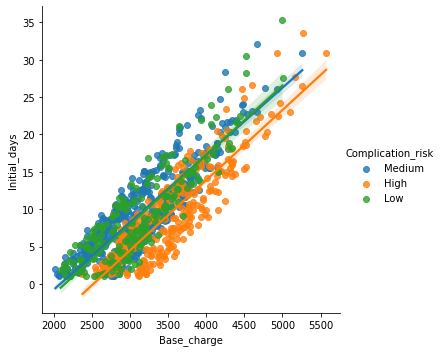

In [ ]:
plt.figure(figsize = (10,6));
sns.lmplot(data = df, x = 'Base_charge',y = 'Initial_days', hue = 'Complication_risk')

3a) Make a barchart to show the average initial days for those with each level of complication risk. (hint: use groupby to groupby the Complication Risk and find the average of the initial days.)
- If you need help with this, refer to slides 42 and 43 in the presentation.

In [ ]:
risk_comp = df.groupby('Complication_risk')['Initial_days'].mean()
risk_comp

Complication_risk
High      9.403992
Low       8.814701
Medium    9.464482
Name: Initial_days, dtype: float64

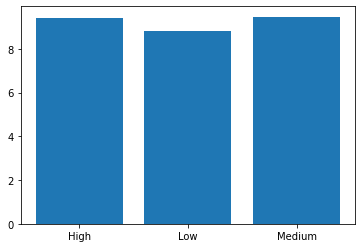

In [ ]:
plt.bar(risk_comp.index, risk_comp.values);


3b) Make the same barchart from 3) using seaborn. Set x equal to complication risk, y equal to initial days and use the order argument for low, medium, high
- sns.barplot(data=df, x=column name, y=column name, order=['Low', 'Medium', 'High'])

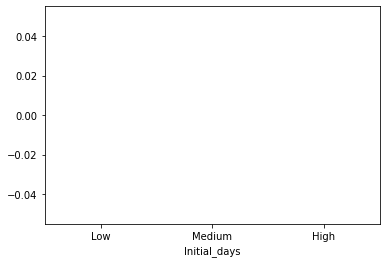

In [ ]:
#seaborn
sns.barplot(data=risk_comp, x=risk_comp.index, y=risk_comp.values, order=['Low', 'Medium', 'High']);

4a) Create a filter to limit the dataset to only those who have high blood pressure (1 = yes, 0 = no).  

How many people have high blood pressure? (Hint: Find the length of your filter)



4b) Now create a bar chart that shows the service received for only those who have high blood pressure.  
- filter['Column name'].value_counts().plot(kind='bar')

4c) Now create the same graph using seaborn.
- sns.countplot(data=filter, x='column name')

In [ ]:
# seaborn


5) Create a heatmap to show any potential correlations in this data
- If you need assistance with this, refer to slide 28 in the presentation

6a) Make a multivariate boxplot graph to compare the distribution of income by gender.
- Use pandas to create the boxplot.
- df.boxplot(by='column name', column = 'column name', grid = False)

In [ ]:
# pandas


6b) Now create a boxplot using seaborn.
- sns.boxplot()

In [ ]:
# seaborn